# Diagramas de rosa de viento

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#!pip install windrose openpyxl
from windrose import WindroseAxes

Definición del directorio de trabajo

In [2]:
os.chdir(os.getcwd())

Importamos y observamos una tabla con valores de velocidad y dirección del viento en un determinado intervalo de tiempo

In [3]:
df = pd.read_csv('Vientos-veloc-direcc.csv')
df.head()

,Tiempo,Velocidad,Direccion
0,1,3.6,192
1,2,4.2,205
2,3,6.4,215
3,4,3.5,240
4,5,4.6,238


**Visualización de histogramas**

Nuestro primer análisis visual es el de los histogramas de cada atributo: Velocidad y dirección

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002118FB42E50>,
      dtype=object)

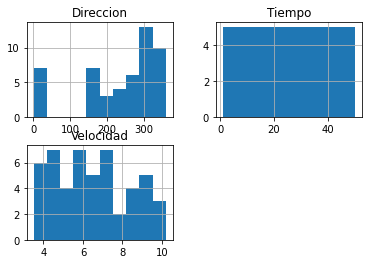

In [4]:
df.hist()

**Visualización de histograma de dirección de viento**

Agrupamos el rango de acimuts de dirección de viento en 16 grupos, que equivalen a intervalos de 22,5 grados (360° entre 22,5° da 16).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021190321D30>]],
      dtype=object)

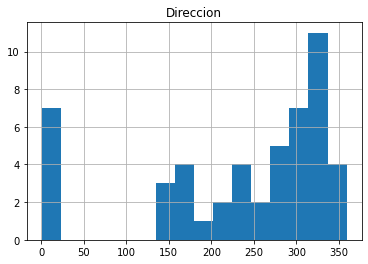

In [5]:
df.hist(column='Direccion', bins=16)

Predominan los vientos del noroeste (acimut 315), seguido del norte (acimut 0 o 360). No hay vientos del este (acimut 90).

**Visualización de histograma de velocidades**

Determinamos los valores máximos y mínimos de velocidades y sus respectivos valores enteros.
El número de barras a graficar (bins) lo estimamos del rango de velocidades más 1

In [6]:
print('Maxima velocidad: ', df['Velocidad'].min())
print('Minima velocidad: ', df['Velocidad'].max())

Maxima velocidad:  10.2
Minima velocidad:  3.5


In [15]:
int_min = int(df['Velocidad'].min())
int_max = int(df['Velocidad'].max())
bins = int_max - int_min + 1
print('Minimo entero: {}; maximo entero: {}; nro bins: {}'.format(int_min, int_max, bins))

Minimo entero: 3; maximo entero: 10; nro bins: 8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021190427D90>]],
      dtype=object)

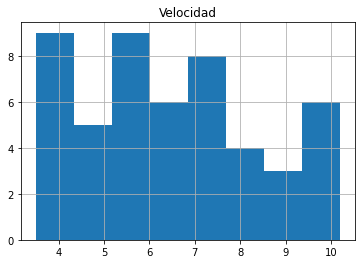

In [8]:
df.hist(column='Velocidad', bins=bins)

Tenemos una mayor presencia de vientos con velocidades de 3, 5 y 7 m/s

**Gráficos de rosas de vientos**

Las rosas de vientos son gráficos en diagramas polares (circulares) que nos ayudan bastante a integrar visualmente la frecuencia de los vientos según su orientación y velocidad.

Mientras más alejados estén los datos del centro del gráfico, más recurrentes (frecuentes) son.

Las velocidades son agrupadas en un determinado número de bins, como en el histograma, mientras más anchos sean los bines de velocidad, más frecuentes son.

La representación de la rosa de vientos en barras es la forma más popular de observarla. Se puede jugar con su apertura para ver más (valor cercano a 0) o menos separadas (valor cercano a 1) las barras.

El paquete *Windrose* desarrollado para Python nos permite de graficar de forma rápida y práctica los diagramas de rosa de viento.

[Text(0, 0, 'E'),
 Text(0, 0, 'NE'),
 Text(0, 0, 'N'),
 Text(0, 0, 'NW'),
 Text(0, 0, 'W'),
 Text(0, 0, 'SW'),
 Text(0, 0, 'S'),
 Text(0, 0, 'SE')]

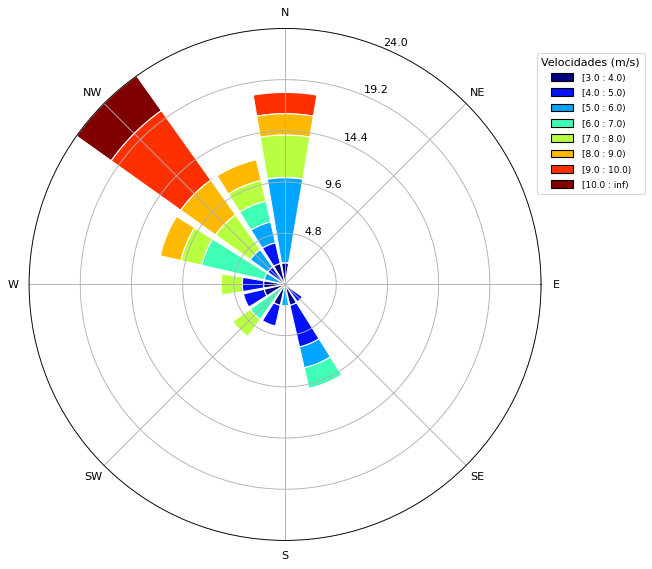

In [45]:
ax = WindroseAxes.from_ax()
ax.bar(df['Direccion'], df['Velocidad'], normed=True, bins=np.arange(int_min, int_max+1, 1), opening=0.85, edgecolor='white')
ax.set_legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.7, 0.45), title= 'Velocidades (m/s)')
ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
#ax.set_rgrids(range(5,25,5))

Los datos graficados nos indican que los vientos predominantes vienen del noroeste (24%) seguido de los vientos del norte con un 18% de los datos reportados. Además constatamos que los vientos del NO en gran medida superan los 7 m/s.

Prácticamente no hay vientos procedentes del este.

Otra forma de representar la rosa de vientos por medio de contornos. Podemos alternativamente etiquetar las diferentes orientaciones con su acimut equivalente.

Si no especificamos normalizar la frecuencia (`normed=True`), numéricamente se expresa el número de repeticiones de cada grupo de datos, ya que por defecto `normed=False`.

[Text(0, 0, '90°'),
 Text(0, 0, '45°'),
 Text(0, 0, '0°'),
 Text(0, 0, '315°'),
 Text(0, 0, '270°'),
 Text(0, 0, '225°'),
 Text(0, 0, '180°'),
 Text(0, 0, '135°')]

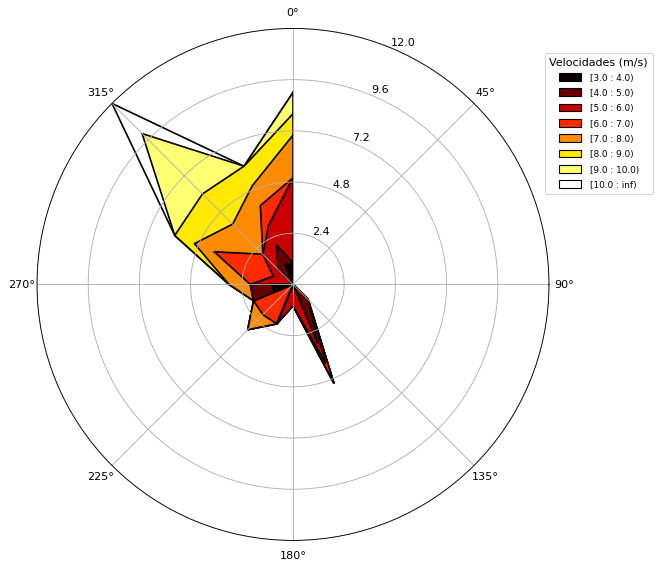

In [41]:
ax = WindroseAxes.from_ax()
ax.contourf(df['Direccion'], df['Velocidad'], bins=np.arange(int_min, int_max+1, 1), cmap=cm.hot)
ax.contour(df['Direccion'], df['Velocidad'], bins=np.arange(int_min, int_max+1, 1), colors='black')
ax.set_legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.7, 0.45), title= 'Velocidades (m/s)')
ax.set_xticklabels(['90°', '45°', '0°', '315°', '270°', '225°', '180°', '135°'])

La opción plot_windorse del paquete *Windrose* también permite, pero en una sola línea, plotear nuestra rosa de vientos

C:\programs\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


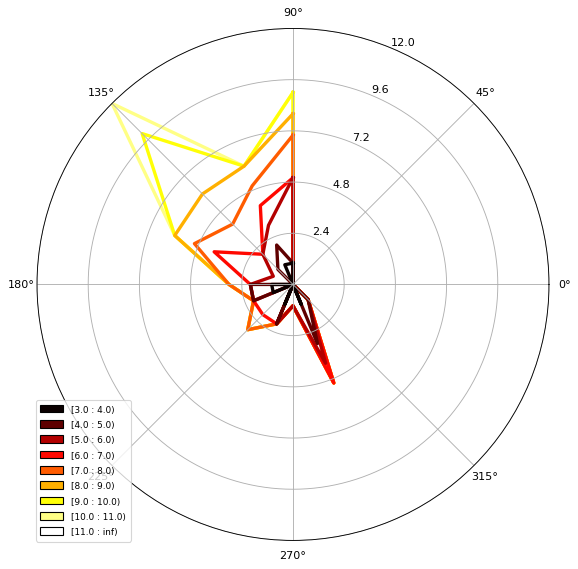

In [23]:
from windrose import plot_windrose
plot_windrose(df['Direccion'], df['Velocidad'], kind='contour', bins=np.arange(int_min, int_max+2, 1), cmap=cm.hot, lw=3)